## 逻辑回归      
**逻辑回归进行分类的主要思想：根据现有数据对分类边界线建立回归公式，以此进行分类。**

Logistic回归的一般过程 
 
1. 收集数据：采用任意方法收集数据。 
2. 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。 
3. 分析数据：采用任意方法对数据进行分析。 
4. 训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。 
5. 测试算法：一旦训练|步骤完成，分类将会很快。 
6. 使用算法：首先，我们需要一些输入数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。 

优点：计算代价不高，易于理解和实现。
缺点：容易欠拟合，分类精度可能不高。
适用数据类型：数值型和标称型数据。

#### 梯度上升法      
梯度上升法的伪代码如下：       
每个回归系数初始化为1      
重复R次：      
   * 计算整个数据集的梯度
   * 使用$alpha × gradient$更新回归系数的向量
   * 返回回归系数

In [21]:
from numpy import *
import matplotlib.pyplot as plt

In [52]:
#梯度上升优化算法
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0 / (1 + exp(-inX))

def gradAscent(dataMatIn, classLabels):
    #转换为Numpy矩阵数据类型
    dataMatrix = mat(dataMatIn)
    labelMat =  mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        #矩阵相乘
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [53]:
dataArr, LabelMat = loadDataSet()

In [54]:
gradAscent(dataArr, LabelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

#### 分析数据：画出决策边界

In [172]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = array(arange(-3.0, 3.0, 0.1))
    print(x)
    #最佳拟合直线
    y = array((-weights[0]-weights[1]*x)/weights[2])
    print(y)
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show

In [173]:
weights = gradAscent(dataArr,LabelMat)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00]
[4.35102773 4.42885454 4

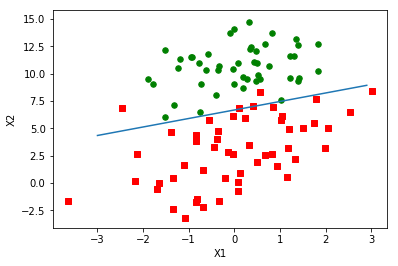

In [175]:
plotBestFit(weights.getA())


#### 随机梯度上升      
所有回归系数初始化为1  
对数据集中每个样本         
       * 计算该样本的梯度  
       * 使用alpha × gradient更新回归系数值          
返回回归系数值  

In [203]:
def stocGradAscent0(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for i in range(numIter):
        dataIndex = range(m)
        for j in range(m):
            alpha = 4 / (1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataMatrix)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            #del dataMatrix[randIndex]
    return weights

In [206]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat, 500)

[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00]
[5.58686484 5.65491472 5

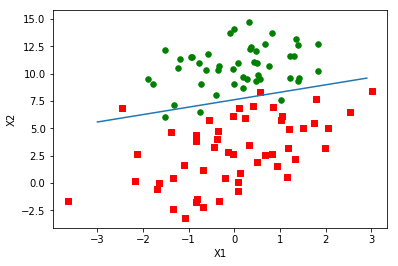

In [207]:
plotBestFit(weights)

#### 从疝气病症预测病马的死亡率


1. 收集数据：给定数据文件。 
2. 准备数据：用Python解析文本文件并填充缺失值。 
3. 分析数据：可视化并观察数据。 
4. 训练算法：使用优化算法，找到最佳的系数。 
5. 测试算法：为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，通过改变迭代的次数和步长等参数来得到更好的回归系数。 
6. 使用算法：实现一个简单的命令行程序来收集马的症状并输出预测结果并非难事，这可以做为留给读者的一道习题。 

In [213]:
#逻辑回归分类函数
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent0(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [214]:
multiTest()

d:\anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


the error rate of this test is: 0.328358
the error rate of this test is: 0.298507
the error rate of this test is: 0.656716
the error rate of this test is: 0.298507
the error rate of this test is: 0.268657
the error rate of this test is: 0.328358
the error rate of this test is: 0.582090
the error rate of this test is: 0.343284
the error rate of this test is: 0.298507
the error rate of this test is: 0.373134
after 10 iterations the average error rate is: 0.377612
